# Plotting notebook
This notebook is intended to show how the circuit work and show the plots

### Studying the system for L = 4

In [ ]:
from src.circuit import Circuit
import numpy as np

L = 4
circuits: list[Circuit] = []
n_circuits = 200
n_prob = 4
p = np.linspace(0, 0.5, n_prob)  # Probability of applying a unitary operator
for prob in p:
    for _ in range(n_circuits):
        circuits.append(Circuit(L, prob))
# Perform full circuit evolution
circuits = np.array(circuits)
steps = 100
entropies = np.zeros((n_circuits, steps + 1, n_prob))
for l, circuit in enumerate(circuits):
    k = l // n_circuits
    j = l % n_circuits
    entropies[j, 0, k] = circuit.state.entanglement_entropy()
    for i in range(1, steps + 1):
        circuit.full_circuit_evolution(3)
        entropies[j, i, k] = circuit.state.entanglement_entropy()

In [ ]:
import matplotlib.pyplot as plt

for k in range(n_prob):
    plt.plot(np.average(entropies[:, 10:, k], axis=0) / L, label=f"p={p[k]:.2f}")
plt.xlabel("Time step")
plt.ylabel("Entanglement entropy")
plt.title("Entanglement entropy over time")
plt.legend()
plt.grid()

In [2]:
import polars as pl

df = pl.read_csv("entropies_structured.csv")
df = df.with_columns(
    pl.col("entropy").cast(pl.Float64),
    pl.col("probability").cast(pl.Float64),
    pl.col("L").cast(pl.Int32),
    pl.col("timestep").cast(pl.Int32),
    pl.col("circuit_num").cast(pl.Int32),
)

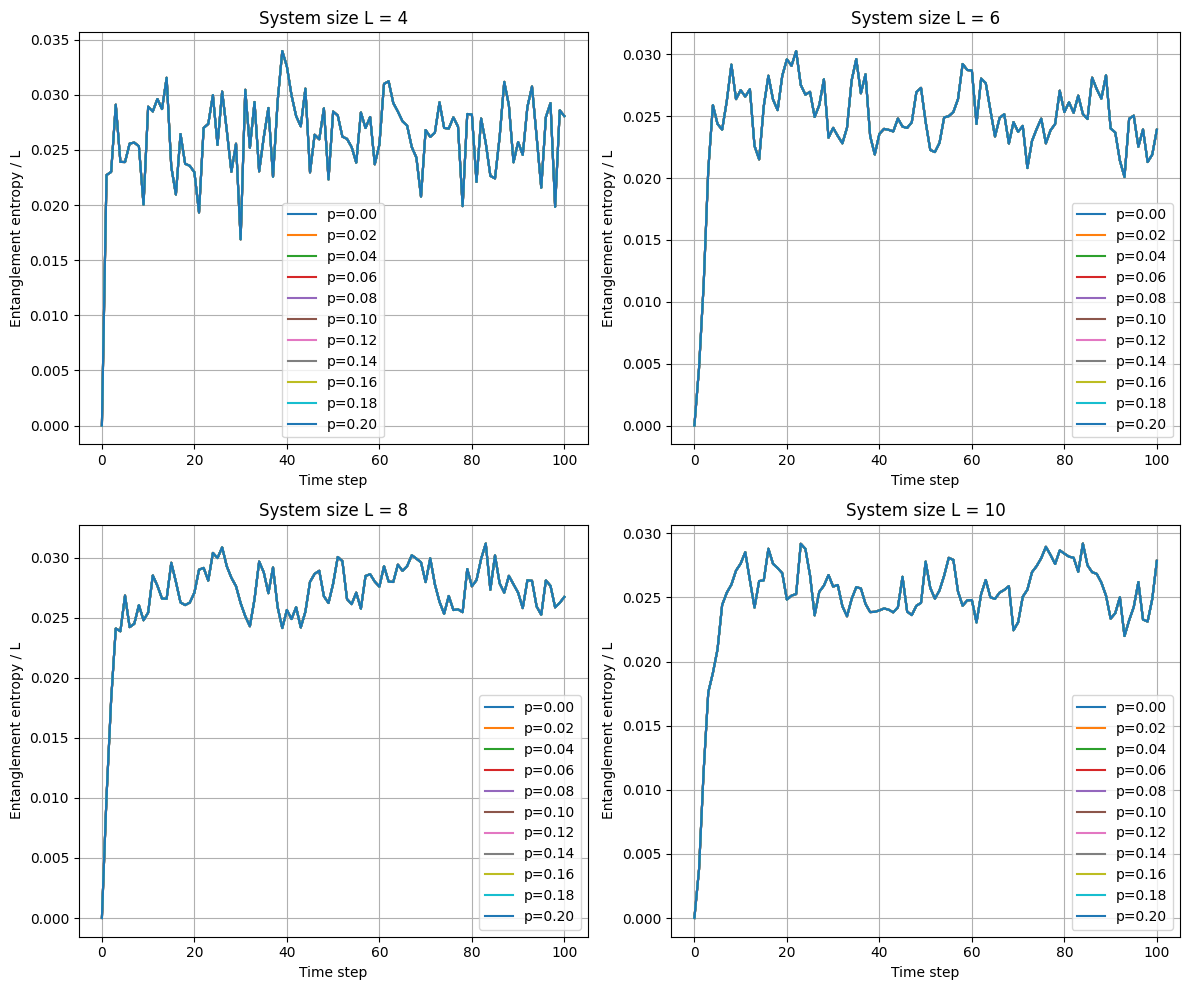

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for different system sizes
L_values = df["L"].unique().sort()
probabilities = df["probability"].unique().sort()

# Create subplots for each system size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, L in enumerate(L_values):
    ax = axes[idx]
    
    # Filter data for this system size
    df_L = df.filter(pl.col("L") == L)
    
    for prob in probabilities:
        # Filter for this probability
        df_prob = df_L.filter(pl.col("probability") == prob)
        
        # Group by timestep and calculate mean entropy across circuits
        avg_entropy = (df_prob
                      .group_by("timestep")
                      .agg(pl.col("entropy").mean().alias("avg_entropy"))
                      .sort("timestep"))
        
        # Plot normalized entropy (divide by L)
        timesteps = avg_entropy["timestep"].to_numpy()
        entropies = avg_entropy["avg_entropy"].to_numpy() / L
        
        ax.plot(timesteps, entropies, label=f"p={prob:.2f}")
    
    ax.set_xlabel("Time step")
    ax.set_ylabel("Entanglement entropy / L")
    ax.set_title(f"System size L = {L}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# now with pbc 
import polars as pl
df = pl.read_csv("entropies_structured_pbc.csv")
df = df.with_columns(
    pl.col("entropy").cast(pl.Float64),
    pl.col("probability").cast(pl.Float64),
    pl.col("L").cast(pl.Int32),
    pl.col("timestep").cast(pl.Int32),
    pl.col("circuit_num").cast(pl.Int32),
)

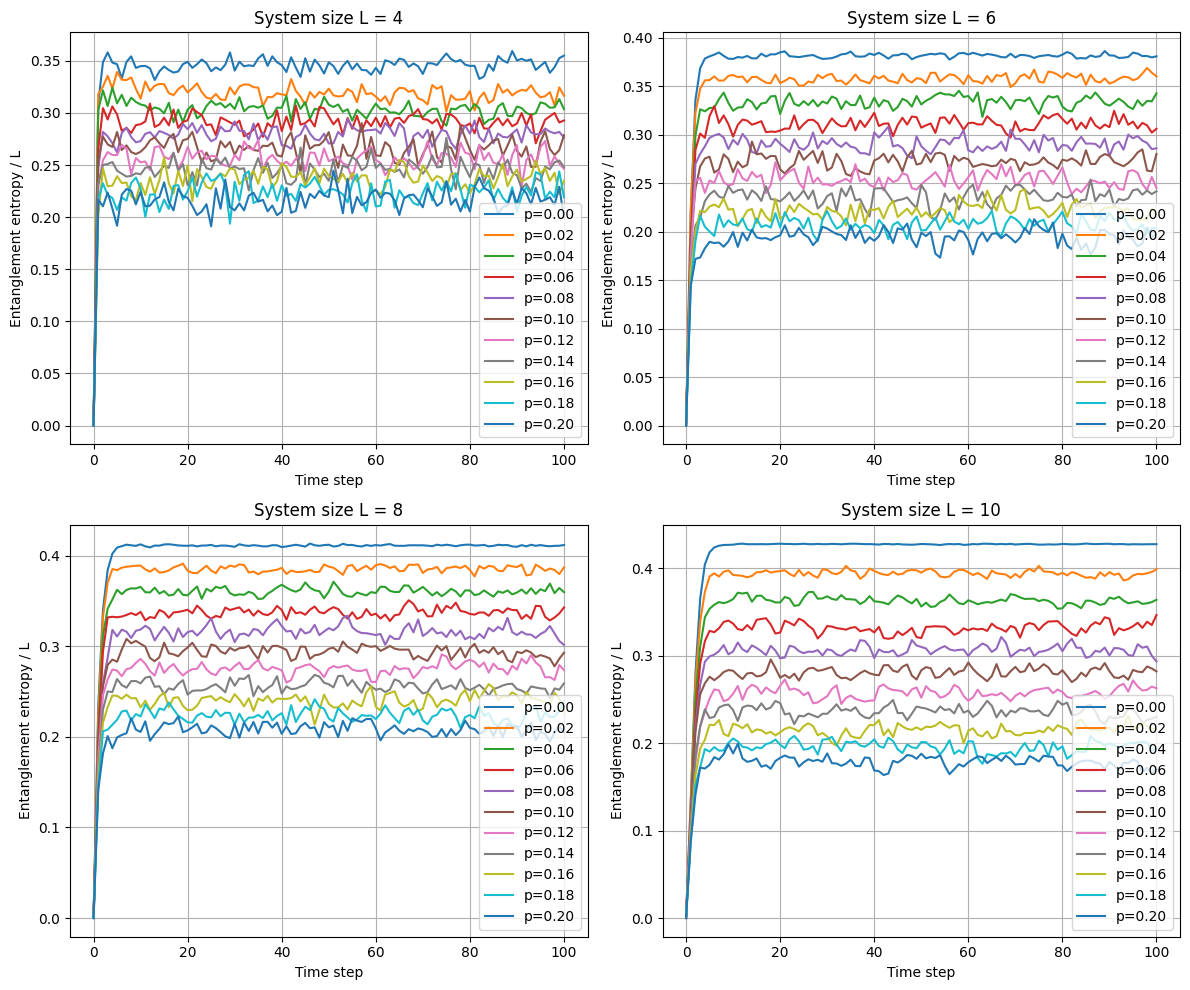

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for different system sizes
L_values = df["L"].unique().sort()
probabilities = df["probability"].unique().sort()

# Create subplots for each system size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, L in enumerate(L_values):
    ax = axes[idx]
    
    # Filter data for this system size
    df_L = df.filter(pl.col("L") == L)
    
    for prob in probabilities:
        # Filter for this probability
        df_prob = df_L.filter(pl.col("probability") == prob)
        
        # Group by timestep and calculate mean entropy across circuits
        avg_entropy = (df_prob
                      .group_by("timestep")
                      .agg(pl.col("entropy").mean().alias("avg_entropy"))
                      .sort("timestep"))
        
        # Plot normalized entropy (divide by L)
        timesteps = avg_entropy["timestep"].to_numpy()
        entropies = avg_entropy["avg_entropy"].to_numpy() / L
        
        ax.plot(timesteps, entropies, label=f"p={prob:.2f}")
    
    ax.set_xlabel("Time step")
    ax.set_ylabel("Entanglement entropy / L")
    ax.set_title(f"System size L = {L}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

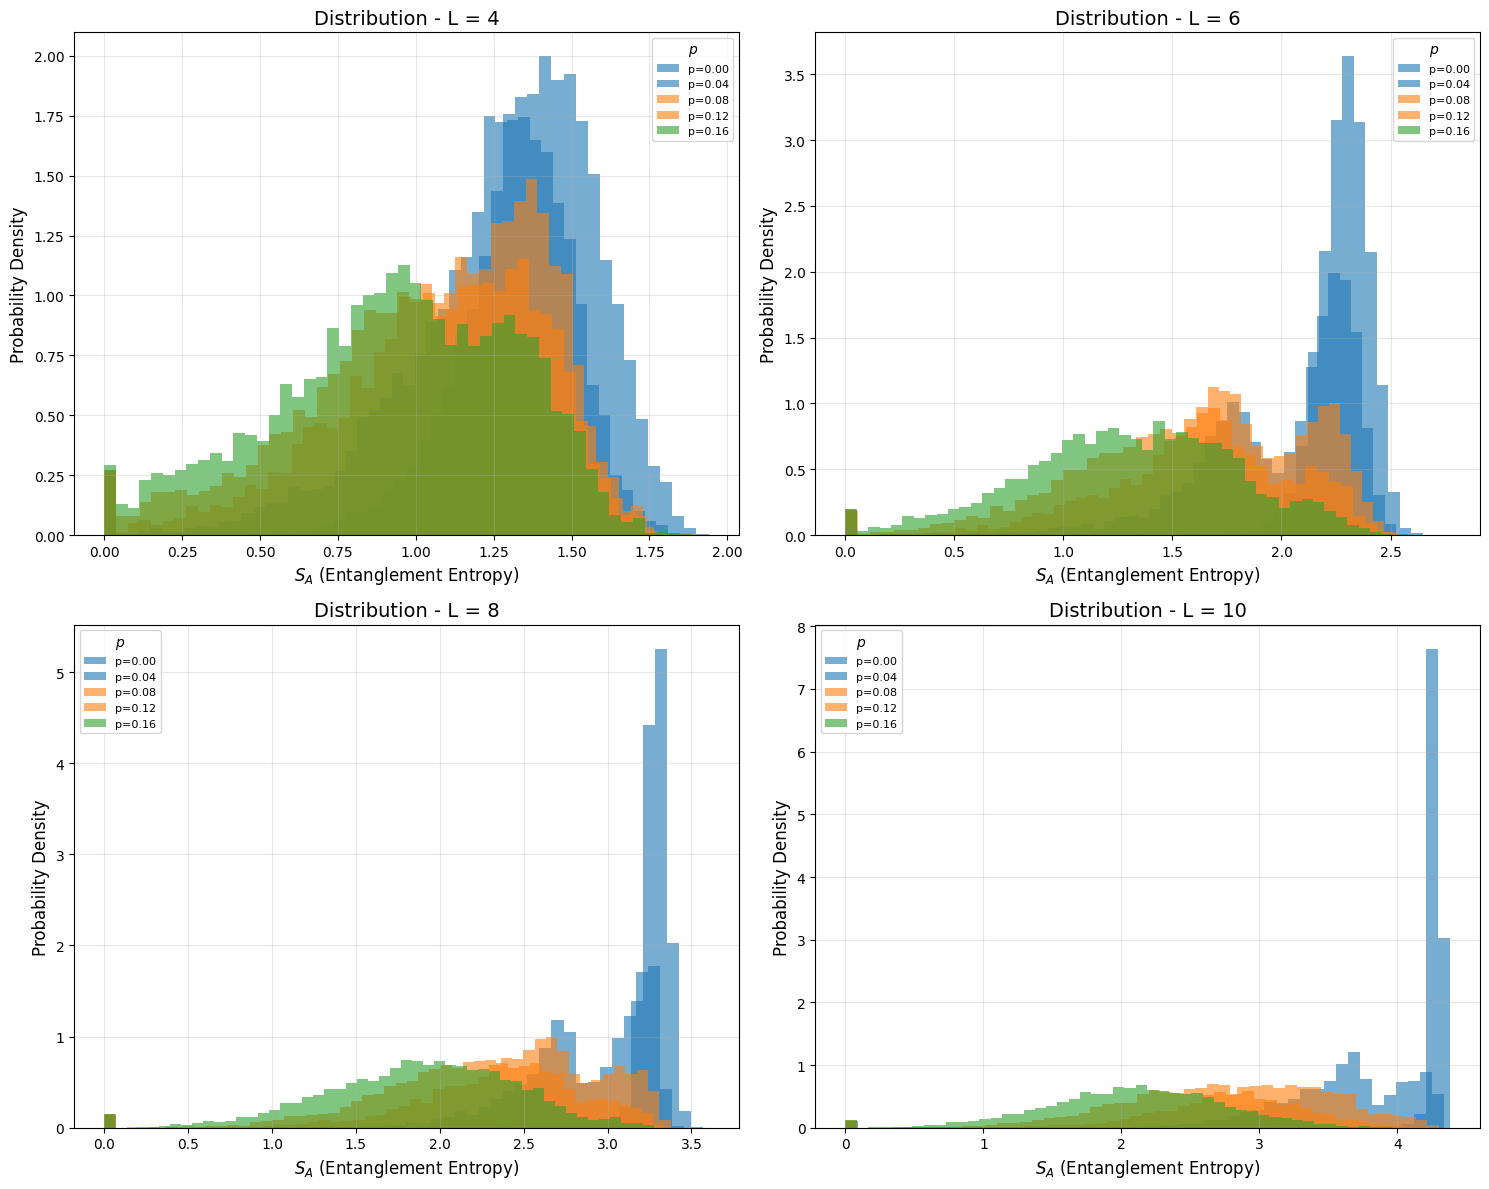

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique L values
L_values = [4, 6, 8, 10]

# Create subplots for all L values
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, L in enumerate(L_values):
    ax = axes[idx]
    
    # Filter data for this system size
    df_L = df.filter(pl.col("L") == L)
    
    # Get the sorted list of unique p values for this L
    p_vals = df_L.select("probability").unique().sort("probability").to_series().to_list()

    
    # Plot histogram for each probability value
    for i, p in enumerate(p_vals[:len(p_vals) // 2:2]):
        entropy_values = df_L.filter(pl.col("probability") == p).select("entropy").to_series().to_numpy()
        
        ax.hist(
            entropy_values,  
            bins=50,
            density=True,   
            alpha=0.6,
            label=f"p={p:.2f}",
            color=colors[i],
            histtype='stepfilled' 
        )
    
    # Plot settings
    ax.set_xlabel(r"$S_A$ (Entanglement Entropy)", fontsize=12)
    ax.set_ylabel("Probability Density", fontsize=12)
    ax.set_title(f"Distribution - L = {L}", fontsize=14)
    ax.legend(title=r"$p$", fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()